<a href="https://colab.research.google.com/github/yamihe19/Project-Heart-Disease-Descriptive-Analysis/blob/main/Code_Heart_Disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Heart Diseases Analysis

### Group Members:
- Alexandra Torres Garcia
- Mary Christina Alexandria Perocho
- Yamileth Hercules
- Lovella Inso

## PROBLEM DESCRIPTION

The principal purpose of this project will be on data cleaning, merging different datasets, aggregating variables, and exploring the variables to see association between the categorical variables and correlation between the numerical ones. The data set that we are going to explore is about Heart Disease.

## DATA

The use of databases and data analysis techniques have become increasingly important in the field of medicine, particularly in the study and treatment of diseases such as heart disease. By analyzing large amounts of medical data, researchers and healthcare professionals can gain valuable insights into the causes, risk factors, and potential treatments for these conditions.Additionally, the use of databases and data analysis can improve patient outcomes by providing more personalized and effective care. As such, a comprehensive analysis of medical databases is crucial for advancing our understanding of heart disease and developing better strategies for prevention and treatment.

For this project we are going to analysis the directory share by Machine Learning Repository (UCI) called "Heart Disease Data Set" . This directory contains 4 databases concerning heart disease diagnosis.
All attributes are numeric-valued.The data was collected from the four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)



## Data Dictionary

Every Table has the same attributes that are 14 attributes


| Column | Description |
| --- | --- |
| age | Age of patients in years |
| sex | Sex (1 = male; 0 = female) |     
| cp | Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) |  
| trestbps | Resting blood pressure (in mm Hg on admission to the hospital) |    
| chol | Serum cholestoral in mg/dl |
| fbs | (Fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |
| restecg | Resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria ) |  
| thalach | Maximum heart rate achieved |
| exang | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest |
|  slope |  The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) |
| ca | Number of major vessels (0-3) colored by flourosopy |   
| thal |  3 = normal; 6 = fixed defect; 7 = reversable defect |    
| num | Diagnosis of heart disease (angiographic disease status) |


Now let's go ahead and have a look at these datasets.

### Import Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
% matplotlib inline

UsageError: Line magic function `%` not found.


### Read the data sets

In [ ]:
cleveland = pd.read_csv('data/processed.cleveland.data', na_values = ['?'], header = None)
cleveland

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
switzerland = pd.read_csv('data/processed.switzerland.data', na_values = ['?'], header = None)
switzerland

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [ ]:
va = pd.read_csv('data/processed.va.data', na_values = ['?'], header = None)
va

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
hungarian = pd.read_csv('data/reprocessed.hungarian.data', delimiter = ' ', na_values = ['?'], header = None)
hungarian

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


### Concatenate data sets

In [ ]:
df = pd.concat([cleveland, switzerland, hungarian, va])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1.0
196,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2.0
198,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Rename Columns

In [ ]:
df.columns = ["age", "sex","cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak","slope","ca", "thal", "num"]

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1.0
196,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2.0
198,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,862.000000,913.000000,838.000000,919.000000,866.000000,866.000000,858.000000,801.000000,600.000000,700.000000,920.000000
mean,53.510870,0.789130,3.250000,131.968677,193.887185,0.078759,0.594124,137.376443,0.378753,0.878788,-0.784020,-3.986667,-0.265714,1.133696
std,9.424685,0.408148,0.930969,19.651971,114.139483,0.965846,0.865464,26.385477,0.582767,1.091226,4.616226,4.910874,7.007515,1.258942
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-2.600000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,167.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,222.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,0.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


## Invalid Values

The variables that have invalid values are: `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal`. Those variables have a negative values that should not be there or a 0  that could not be a value for those numerical values like cholesterol(chol) or resting blood pressure(trestbps), which are not making any sense.  

## Replacing Invalid values

* We already found that -9 is a invalid value for any variable above, we are going to replace as a nan value and then we are going to deal with them as missing values.
* We also realized that some variables like : `trestbps` and  `chol` must not have 0 because they are measuring Cholesterol levels and Maximum Heart Rate  and those cannot be 0

In [ ]:
inv_variables= ['trestbps','chol','fbs', 'restecg','thalach', 'exang', 'oldpeak','slope','ca','thal']
for var in inv_variables:
    print(var, df[var].unique())

trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  95.  nan  80. 185. 113. 190.
  92.  98.  -9. 116.   0.  96. 127.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 

In [ ]:
inv_variables1= ['trestbps','chol']
for var1 in inv_variables1:
    df[var1].replace([-9.,0.], np.nan, inplace= True)
    print(var1, df[var1].unique())


trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  95.  nan  80. 185. 113. 190.
  92.  98. 116.  96. 127.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 210. 327. 

In [ ]:
inv_variables2= ['fbs', 'restecg','thalach', 'exang','slope','ca','thal']
for var2 in inv_variables2:
    df[var2].replace(-9., np.nan, inplace= True)
    print(var2, df[var2].unique())

fbs [ 1.  0. nan]
restecg [ 2.  0.  1. nan]
thalach [150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90. 176. 110.  92. 104.  60.  82. 135.
  83.  98. 100.  94. 119.  63.  70.  77.  72.  78.  86.  93.  67.  nan
  87. 102.  91.  84.  80. 107.  69.  73.]
exang [ 0.  1. nan]
slope [ 3.  2.  1. nan]
ca [ 0.  3.  2.  1. nan  9.]
thal [ 6.  3.  7. nan]


In [ ]:
inv_variables= ['trestbps','chol','fbs', 'restecg','thalach', 'exang', 'oldpeak','slope','ca','thal']
for var in inv_variables:
    print(var, df[var].unique())


trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  95.  nan  80. 185. 113. 190.
  92.  98. 116.  96. 127.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 210. 327. 

So now that we replace the invalid values, we are going to deal with the missing values.

There are several techniques commonly used to replace missing values in a dataset, including:
1. Mean or median imputation
2. Mode imputation
3. Regression imputation
But in this ocassion we decided to use Mean imputation for numerical variables and Mode imputation(the most frecuent value) for categorical variables.


### Missing values

Looking the sum  of missing values of the data set.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        487
slope       310
chol        203
fbs          91
oldpeak      63
trestbps     61
thalach      56
exang        56
restecg       3
age           1
sex           1
cp            1
num           1
dtype: int64

<AxesSubplot:>

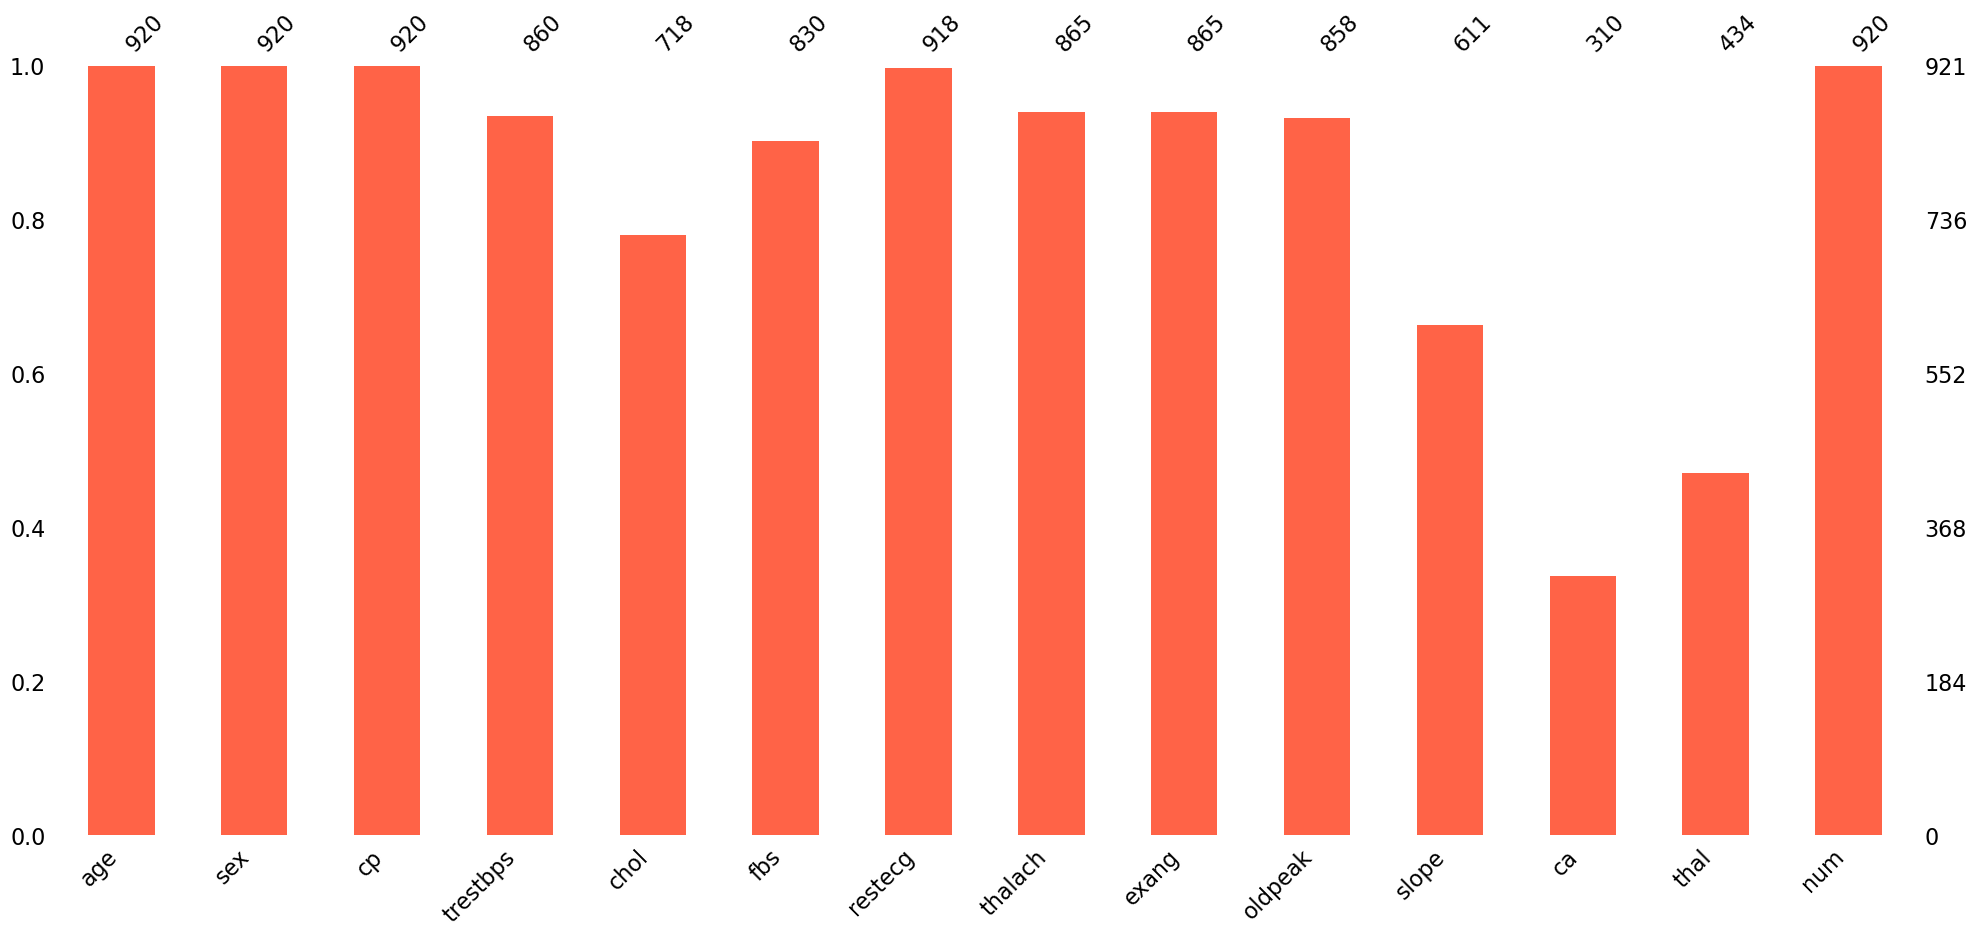

In [ ]:

msno.bar(df, color="tomato")

#### will drop only 1 row has Nan, it might cause bias to the data later
- age
- sex      
- cp      
- num
- restecg

#### Numerical variable to replace NaN with mean
- tresbps  
- chol
- thalanch
- oldpeak

#### Categorical variable to replace NaN with mode
- fbs
- exang
- slope
- ca
- thal

### Filtering out  missing values

In [ ]:
# dropping columns with 1-2 NaN values
df.dropna(subset = ['age','sex','cp','num','restecg'], inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

ca          608
thal        484
slope       308
chol        201
fbs          89
oldpeak      62
trestbps     60
thalach      55
exang        55
age           0
sex           0
cp            0
restecg       0
num           0
dtype: int64

In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

### Fill in missing values

#### Fill in numerical values

In [ ]:
#replace NaN to the mean value for numerical variables (trestbps, chol, thalanch, oldpeak)
for col in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    df[col] = df[col].fillna(value=df[col].mean())

#### Fill in categorical values

In [ ]:
# replace NaN to the mode value for categorical variables (fbs,exang,slope,ca,thal)
for catcol in ['fbs', 'exang', 'slope', 'ca', 'thal']:
    df[catcol] = df[catcol].fillna(value=df[catcol].mode()[0])

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<AxesSubplot:>

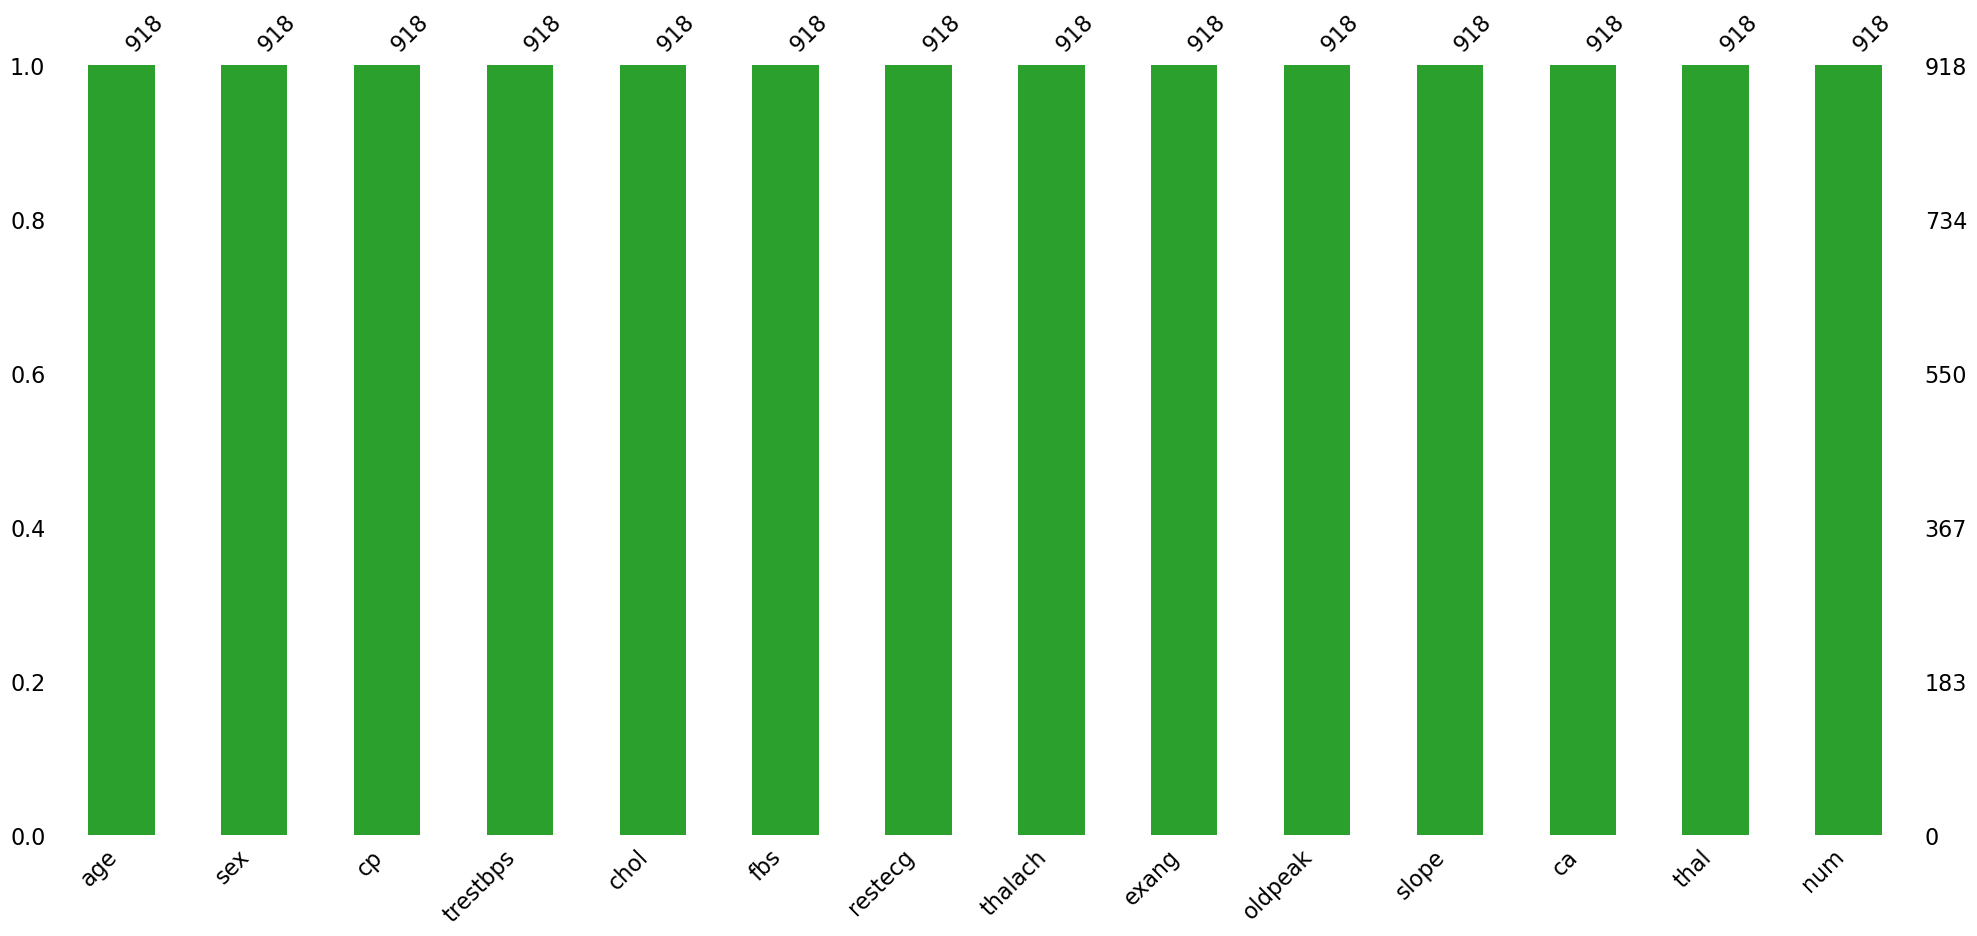

In [ ]:
msno.bar(df, color="tab:green")

## Numerical Analysis

### Covert Categorical variables

Covert categorical variables as category type, because python is reading those variables as float.
The variables that we are going to convert are: `sex`, `cp`, `fbs`, `exang`, `slope`, `thal`, `restecg` and  `num`.

In [ ]:
# Tranforming the variables that are categories as category type
categorical_var = ['sex','cp', 'fbs', 'exang', 'slope', 'thal', 'restecg', 'num', 'ca']
for var in categorical_var:
    df[var]= df[var].astype('category')



### Filter the numerical variables

Because we already converted the categical variables as the data type that should have them, now, we can filter the numerical variables to analyse each of it.

In [ ]:
num_var = df.select_dtypes(include=np.number)
num_var

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.000000,233.0,150.000000,2.300000
1,67.0,160.000000,286.0,108.000000,1.500000
2,67.0,120.000000,229.0,129.000000,2.600000
3,37.0,130.000000,250.0,187.000000,3.500000
4,41.0,130.000000,204.0,172.000000,1.400000
...,...,...,...,...,...
195,54.0,127.000000,333.0,154.000000,0.000000
196,62.0,132.297203,139.0,137.528389,0.880607
197,55.0,122.000000,223.0,100.000000,0.000000
198,58.0,132.297203,385.0,137.528389,0.880607


The numerical variables are saved in the variables called : `num_var`.

### Check the summary statistics

In [ ]:
df.describe()


,age,trestbps,chol,thalach,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.530501,132.297203,246.765690,137.528389,0.880607
std,9.412783,17.929500,51.728052,25.159969,1.054284
min,28.000000,80.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,217.250000,120.000000,0.000000
50%,54.000000,130.000000,246.765690,138.000000,0.800000
75%,60.000000,140.000000,266.750000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


### Interpretation:
* The variable `age` seems to be similar the value of the mean and the median,the standard deviation is small so the variance of the distribution is ok. The shape of the distribution most be almost symmetric.
* The variable `trestbps` show a similar value of the mean and the median, the standard deviation is a quite small.
* The variables `chol` and  `thalach`  have a maximun value very far away from the 3rd quantile, that could be outliers in the maximun value. The median is greater than the mean, for sure there is negative skewness.
* The variable `oldpeak` maximun value very far away from athe 3rd quantile, that  could be outliers in the maximun value. The median is less than the mean, for sure there is positive skewness.


Let's go ahead and visualize the variables or columns and see the distribution of them.

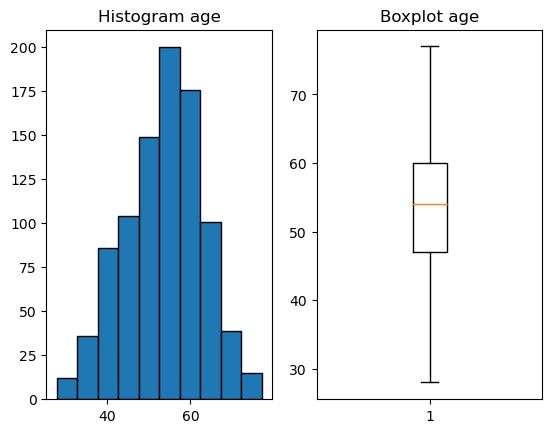

<Figure size 1500x800 with 0 Axes>

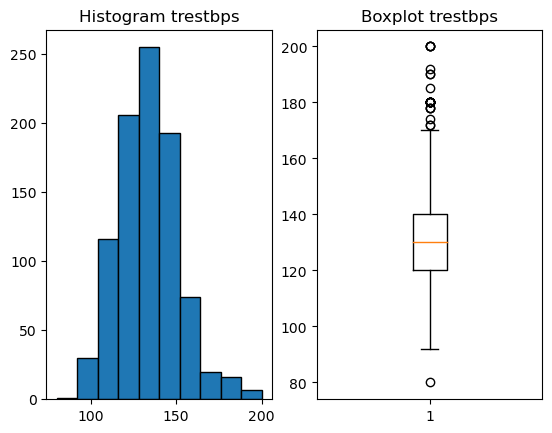

<Figure size 1500x800 with 0 Axes>

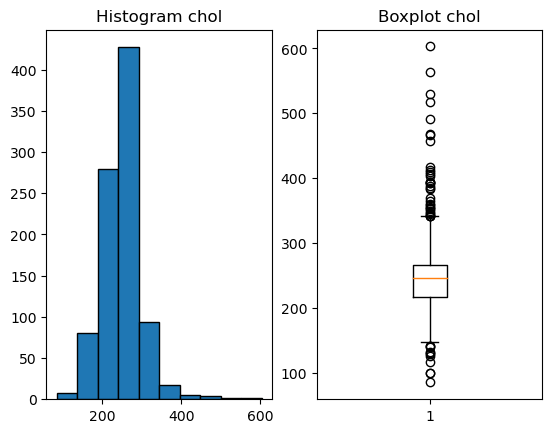

<Figure size 1500x800 with 0 Axes>

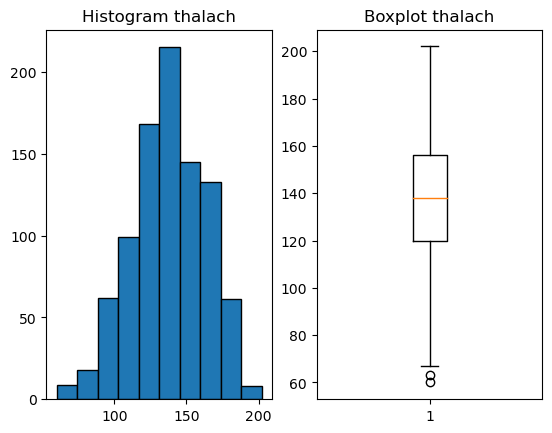

<Figure size 1500x800 with 0 Axes>

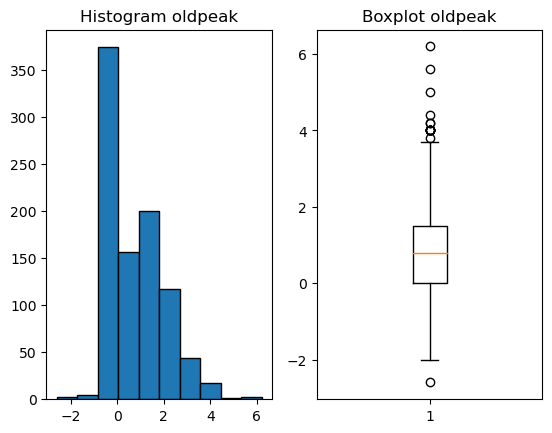

<Figure size 1500x800 with 0 Axes>

In [ ]:
def graph_variables(variables):
    #define grid of plots
    for column_name in  variables:
        fig, axs = plt.subplots(nrows=1, ncols=2)

        #create histograms
        plt.figure(figsize=(15,8))
        axs[0].hist(df[column_name], edgecolor='black')
        axs[1].boxplot(df[column_name])

        #add title to each histogram
        axs[0].set_title('Histogram ' + column_name)
        axs[1].set_title('Boxplot ' + column_name)
graph_variables(num_var)

We can see the distribution and the boxplot of the variables in the above graphs. Now we are going to mention son interpretation of those:
The variable `age` show a normal distribution with no outliers.
The variables that show a skewed distribution and have outliers are : `trestbps`, `chol`, `thalac`,  and  `oldpeak`

##### Note:
In clinical studies, it is generally not recommended to filter or change the distribution of the data, including removing outliers, because doing so can introduce bias and distort the results of the study. Outliers are data points that are significantly different from the rest of the data and may be due to measurement error, biological variation, or other factors. While outliers can be a inconvenience, they may also contain important information about the underlying population being studied, and removing them can lead to biased estimates and incorrect conclusions.

Therefore, it is generally recommended to report and analyze all data, including outliers, and to use appropriate statistical methods that can handle non-normal distributions or outliers, such as non-parametric tests or robust regression models. This can help ensure that the results of clinical studies are accurate, unbiased, and generalizable to the broader population of interest.

Because of the above mention we are not  going to filter outlier or remove them.


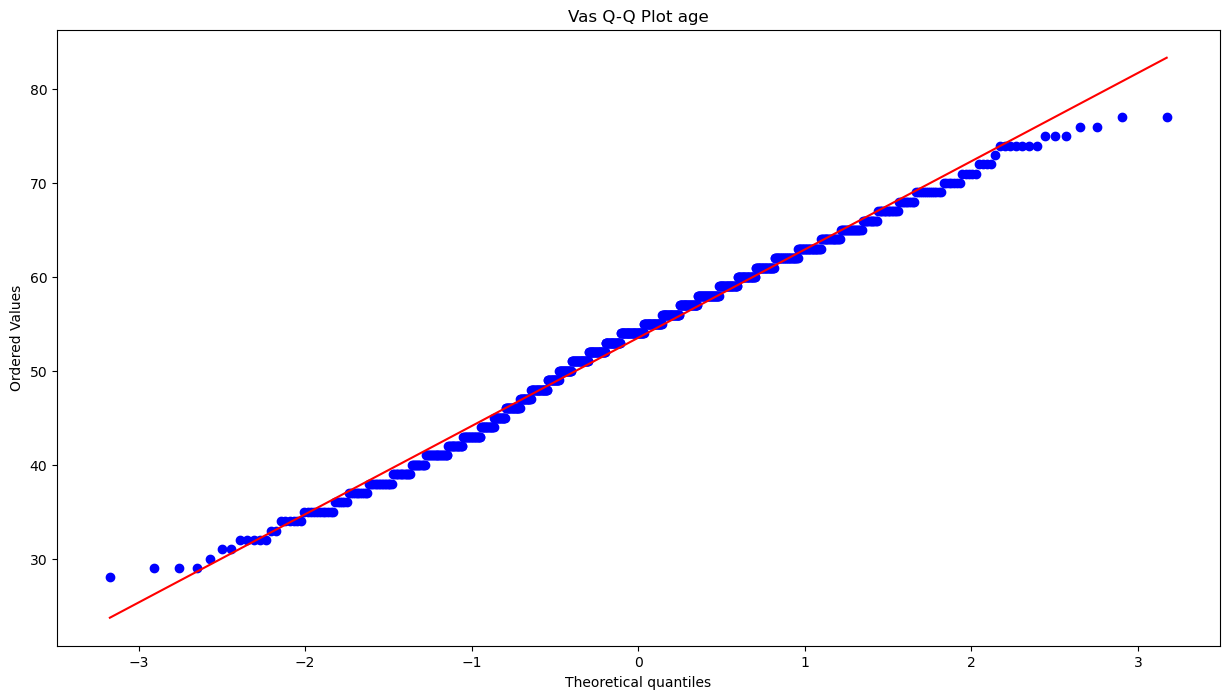

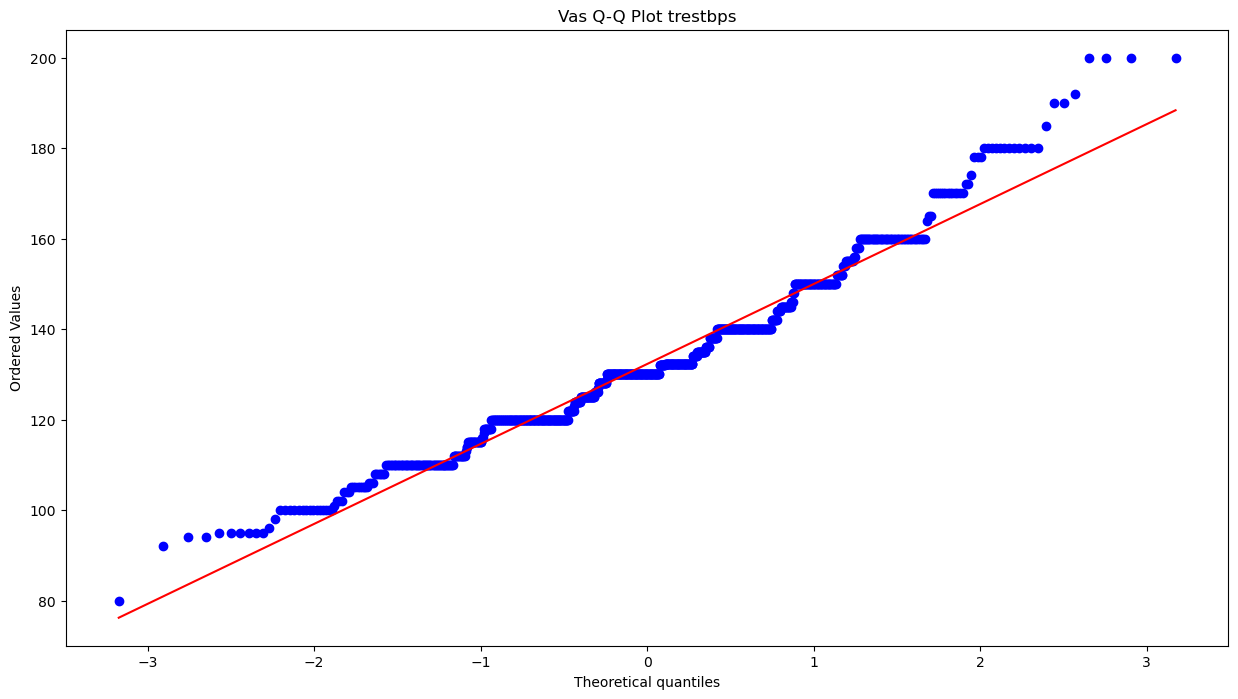

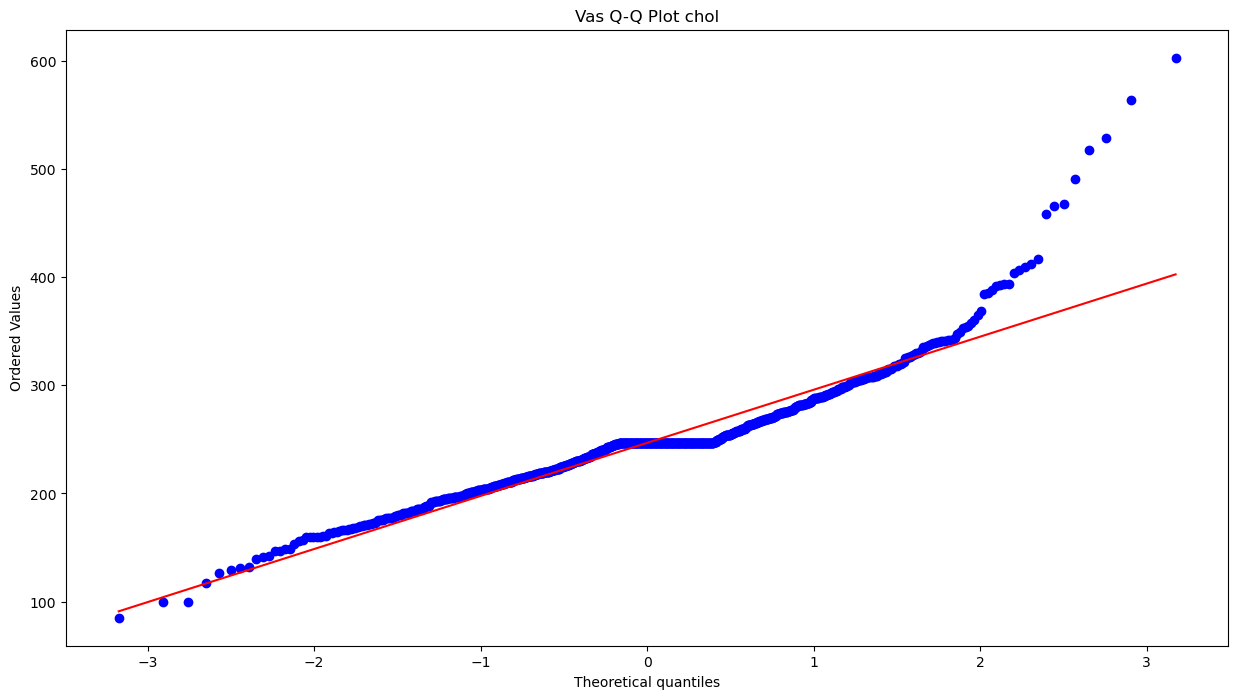

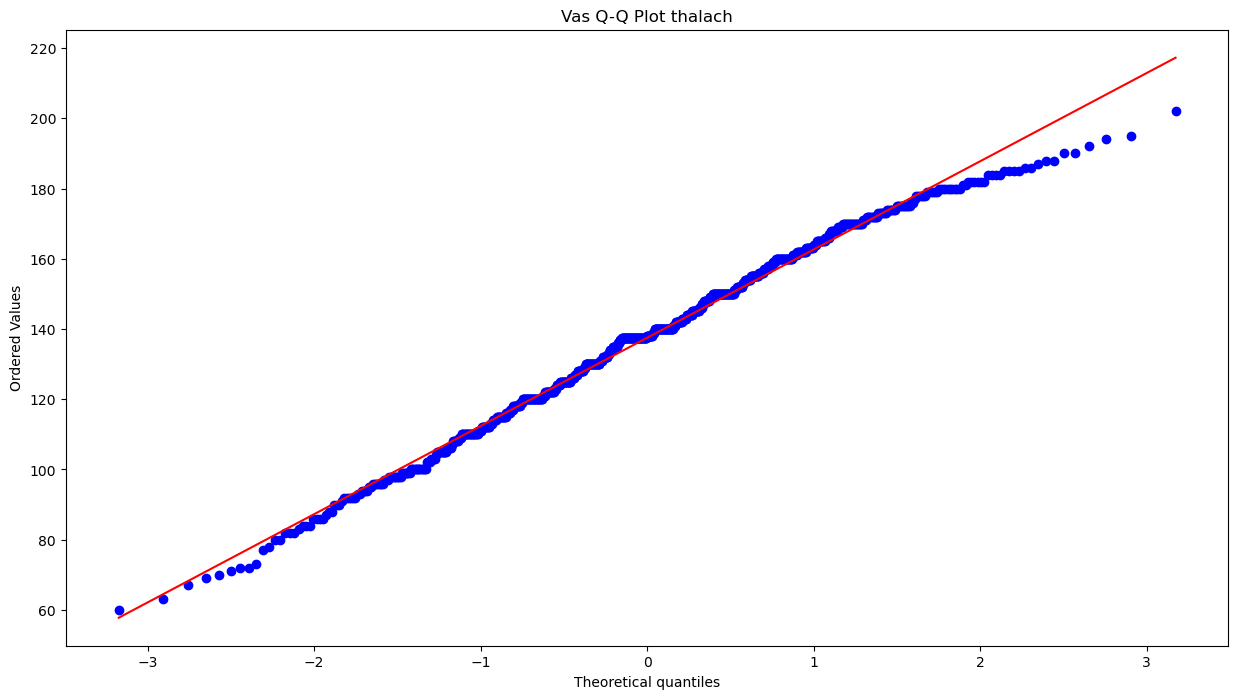

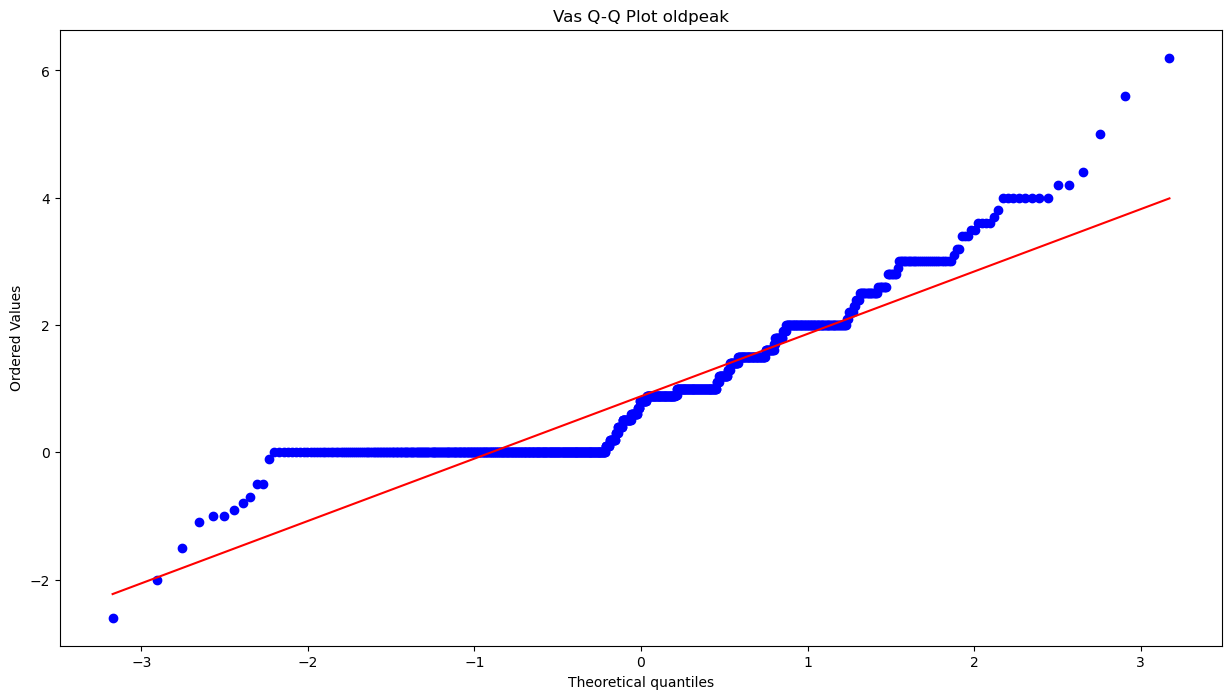

In [ ]:
import pylab as py
import pylab
def graph_qqplot(columns_list):
    for variable in columns_list:
        plt.figure(figsize=(15,8))
        stats.probplot(df[variable], dist="norm", plot=pylab)
        plt.title("Vas Q-Q Plot " +  variable)

graph_qqplot(num_var)

The Q-Q plot is created by plotting the quantiles of the sample data against the corresponding quantiles of the theoretical distribution.The x-axis represents the theoretical distribution, usually the standard normal distribution, and the y-axis represents the sample distribution. Each point on the Q-Q plot represents a pair of quantiles from the two distributions.
* Fo the variable 'age' the points does not deviate significantly from the diagonal line, it suggests that the sample distribution is well described by the theoretical distribution, which is the normal distribution.
* As we can see in the Plot above. The variables that not follow a normal distrubution are:
* 1. `trestbps`
* 2. `oldpeak`
Those variables the points deviate significantly from the diagonal line, it suggests that the sample distribution is not well described by the theoretical distribution.
* For the  other two  variables that are : `chol` and `thalac` seems that are they just deviate significantly at the very beggining of the diagonal line.

## Creating a New Variable

The variable that we are going to create is to see the difference between `not having Heart disease` and  `having Heart disease` a binary variable(0,1), that is because we had a ordinal variable `num` with 5 levels or clases of Heart disease status (0,1,2,3, or 4).

In [ ]:
# Creating another variable HD
df['HD']= df['num'].map(lambda row: int(bool(row)))
df['HD']

0      0
1      1
2      1
3      0
4      0
      ..
195    1
196    0
197    1
198    0
199    1
Name: HD, Length: 918, dtype: int64

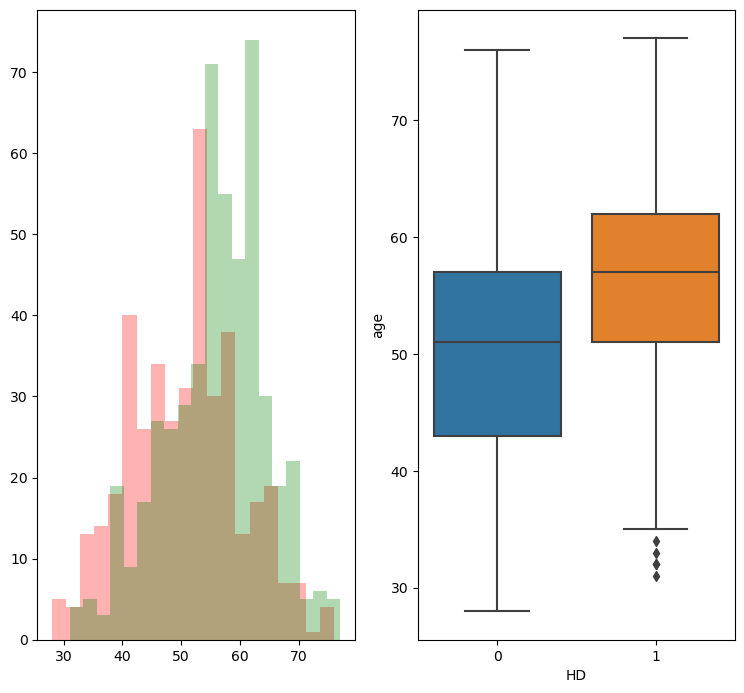

In [ ]:
def hist_box(column):
    fig = plt.figure(figsize=(9, 18))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax1.hist(df[df['HD']==0][column], bins=20, color='r', alpha=0.3)
    ax1.hist(df[df['HD']==1][column], bins=20, color='g', alpha=0.3)
    sns.boxplot(x='HD', y=df[column],  data=df)
hist_box('age')

As we can observe the graphs above the median of people's age that have Heart disease is higher than the people who does not have Heart disease. We can also see some outliers of the group 1.

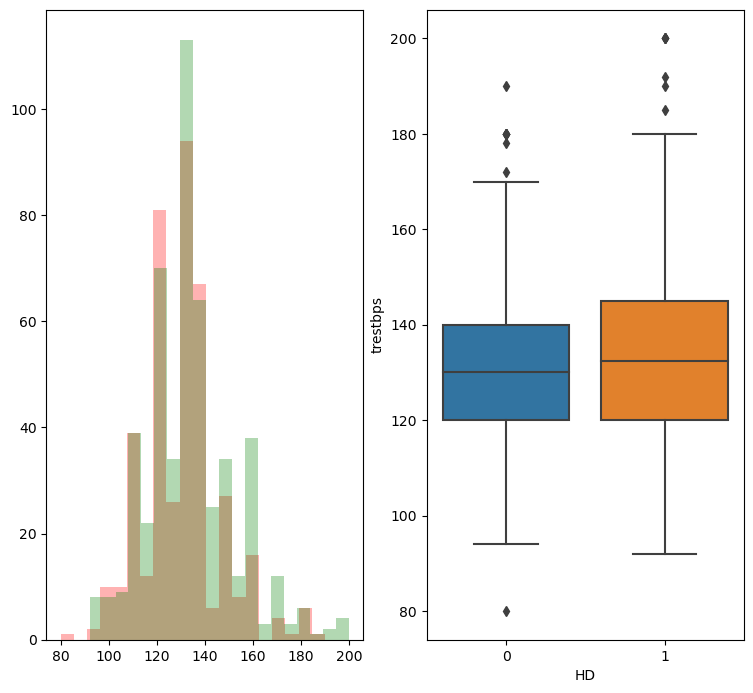

In [ ]:
hist_box('trestbps')

As we can observe the graphs above the median of people's blood pressure when they are resting  that have Heart disease is almost similar than the people who does not have Heart disease. We can also see some outliers in both groups.

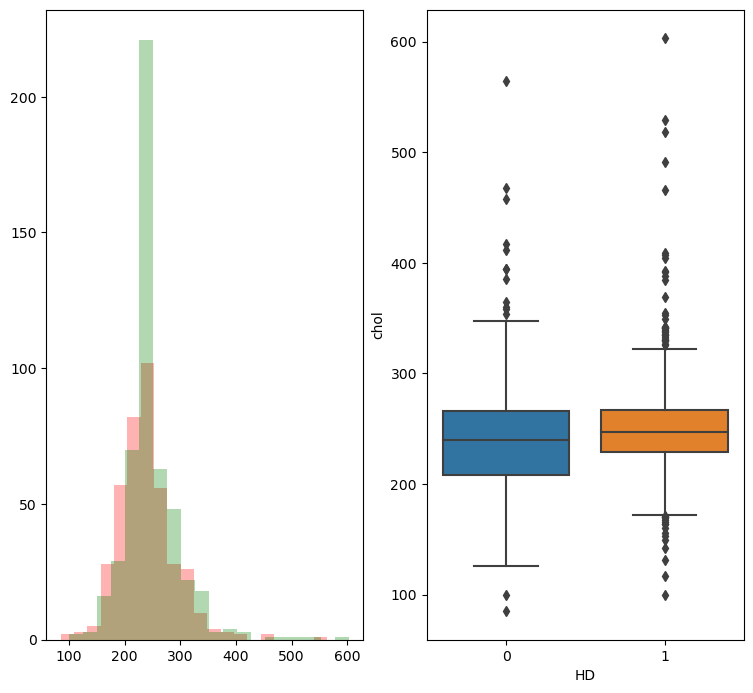

In [ ]:
hist_box('chol')

As we can observe the graphs above the median of people's cholesterol leve that have Heart disease is almost similar than the people who does not have Heart disease, however, the spred of the distribution for the group that have heart disease is smaller than the group 0. We can also see some outliers in both groups, but there are more in the group 1(having heart disease).

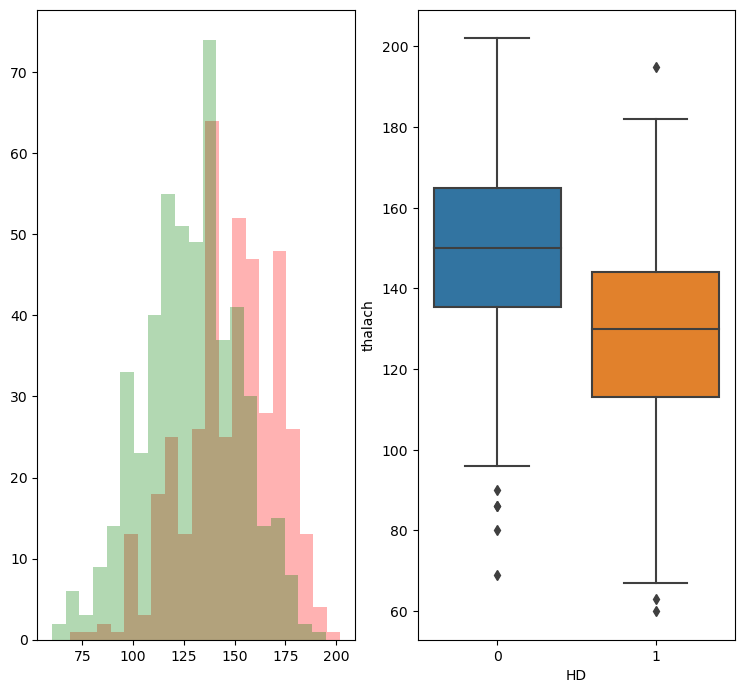

In [ ]:
hist_box('thalach')

As we can observe the graphs above the median of people's maximun heart rate achieved  that have Heart disease is smaller than the people who does not have Heart disease, however, the spred of the distribution for the group that have heart disease is similar than the group 0. We can also see some outliers in both groups, but there are more in the group 0(No have heart disease).

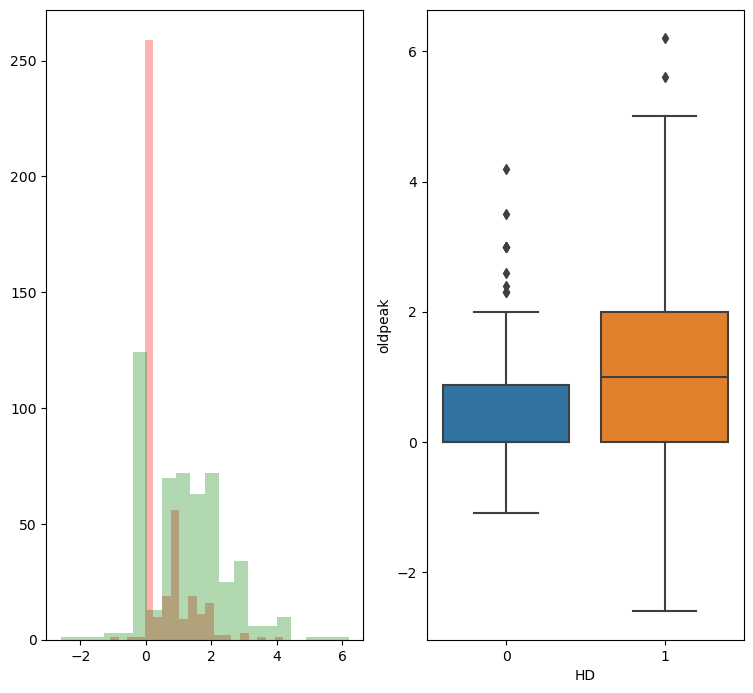

In [ ]:
hist_box('oldpeak')

As we can observe the graphs above the median of people's ST depression induced that have Heart disease is similar than the people who does not have Heart disease, however, the spred of the distribution for the group that have heart disease is greater than the group 0. We can also see some outliers in both groups, but there are more in the group 0(No have heart disease).

## Correlation analysis

In [ ]:
correlation_var= df.corr()
correlation_var

,age,trestbps,chol,thalach,oldpeak,HD
age,1.000000,0.242204,0.073870,-0.352923,0.247568,0.285494
trestbps,0.242204,1.000000,0.072793,-0.101496,0.169648,0.113961
chol,0.073870,0.072793,1.000000,-0.038336,0.041795,0.104145
thalach,-0.352923,-0.101496,-0.038336,1.000000,-0.149359,-0.383958
oldpeak,0.247568,0.169648,0.041795,-0.149359,1.000000,0.374920
HD,0.285494,0.113961,0.104145,-0.383958,0.374920,1.000000


The table above show if the variable how a Pearson's correlation. We interprete the results that way:
* 1. Weak correlation: 0 < |r| < 0.3  
* 2. Moderate correlation:  0.3 < |r| < 0.7  
* 3. Strong correlation:   |r| > 0.7

Therefore, the  tabla  above shows that there are not moderate or strong correlation, just shows weak correlation between the numerical variables.

For example Thalach and age shows a weak negative linear association between them (-0.353)

<AxesSubplot:>

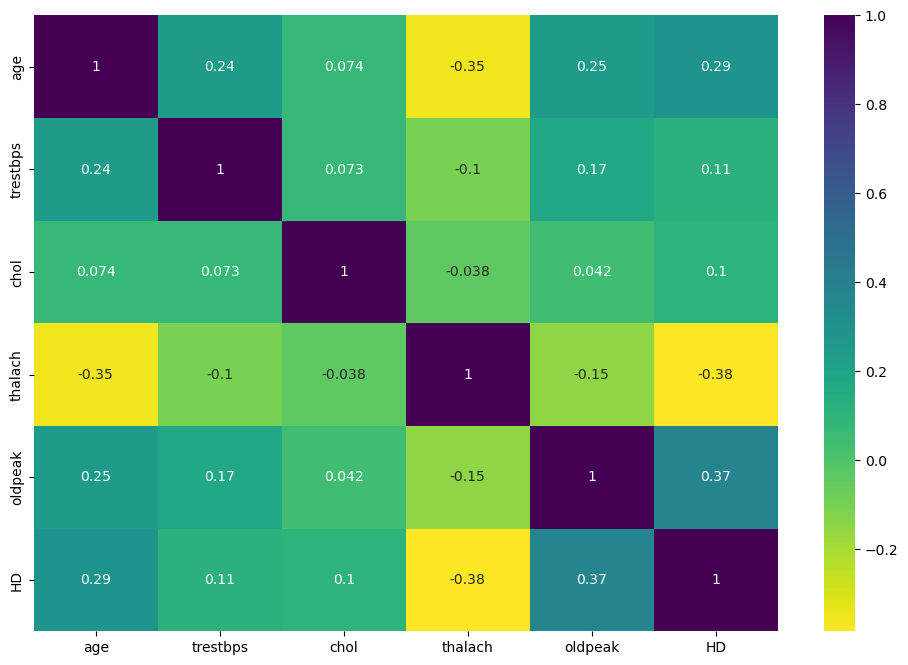

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap= 'viridis_r')

In [ ]:
[[x] * 4 for x in range(1,5)]

[4, 8, 12, 16]

### Interpretation:
A heatmap is a graphical representation of data where the values of a matrix are represented as colors. Heatmaps are commonly used to display large datasets and provide a visual
summary of the data.

As we can see above this heatmap represent the numerical variables that have a correlation. High correlation are represented by darker color and weak correlation are represented by lighter colors. By examining the heatmap, we could quickly identify patterns in the data and see that there is not strong correlation between the numerical variables.